# **Paqueterias**

In [1]:
! pip install yfinance

     |████████████████████████████████| 5.5MB 7.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=279bed62c7aaef612ca4024c596885b5569daeed79c9457589e89dfcb0c9b7a0
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
pip install -U statsmodels

     |████████████████████████████████| 9.5MB 11.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pylab 
import scipy.stats as stats


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import ExponentialSmoothing
from scipy.special import ndtri

# **Pronostico con datos en dias**

In [4]:
tn=200
tp=300
fn=12
fp=30

print('Accuracy: ', (tn+tp)/(tn+tp+fn+fp))


Accuracy:  0.922509225092251


#### **Descarga de información de yahoo finance**

In [ ]:
data_d=yf.download(tickers="GC=F",period='max',interval='1d',group_by='column',start='2008-01-01',auto_adjust=True,prepost=True,threads=True,proxy=None)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_d.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df_d1=data_d.Close
df_h1=data_d.High
df_l1=data_d.Low
df_v1=data_d.Volume
df_o1=data_d.Open

In [ ]:
dt1=df_d1
db1=df_d1
dh1=df_h1
dl1=df_l1
dv1=df_v1
dvar1=dh1-dl1

#### **Exploracion de datos**

In [ ]:
print(db1)

Date
2008-01-02     857.000000
2008-01-03     866.400024
2008-01-04     863.099976
2008-01-07     859.599976
2008-01-08     878.000000
                 ...     
2020-10-05    1912.500000
2020-10-06    1901.099976
2020-10-07    1883.599976
2020-10-08    1888.599976
2020-10-09    1929.599976
Name: Close, Length: 3220, dtype: float64


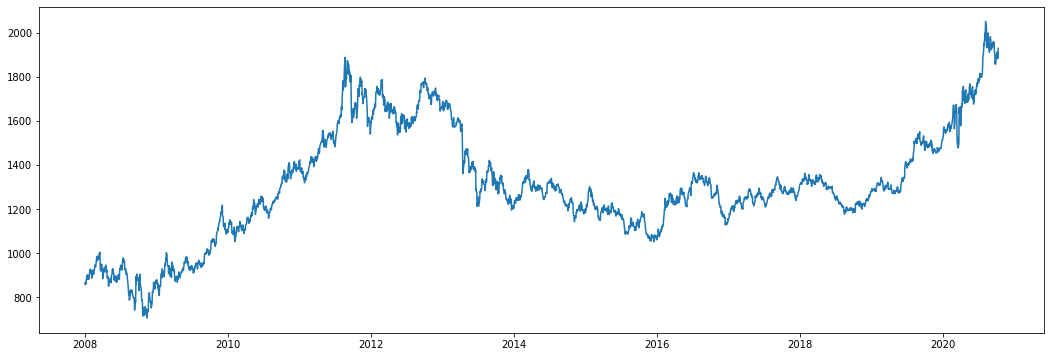

In [ ]:
plt.rcParams['figure.figsize']=[18,6]
plt.plot(db1)

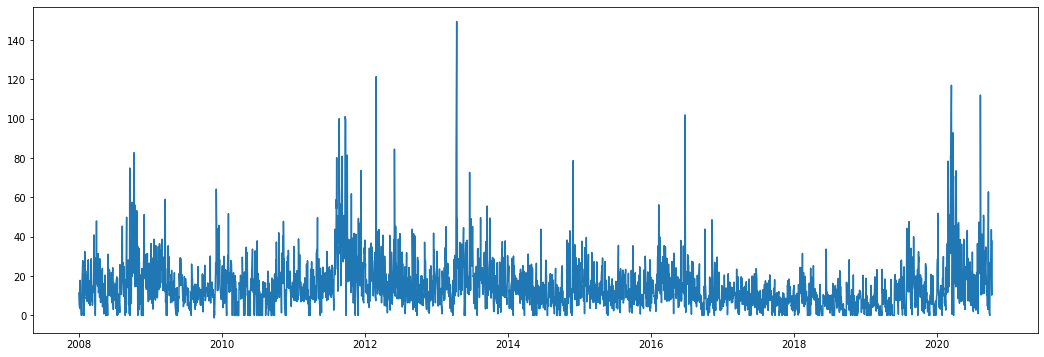

In [ ]:
plt.rcParams['figure.figsize']=[18,6]
plt.plot(dvar1)

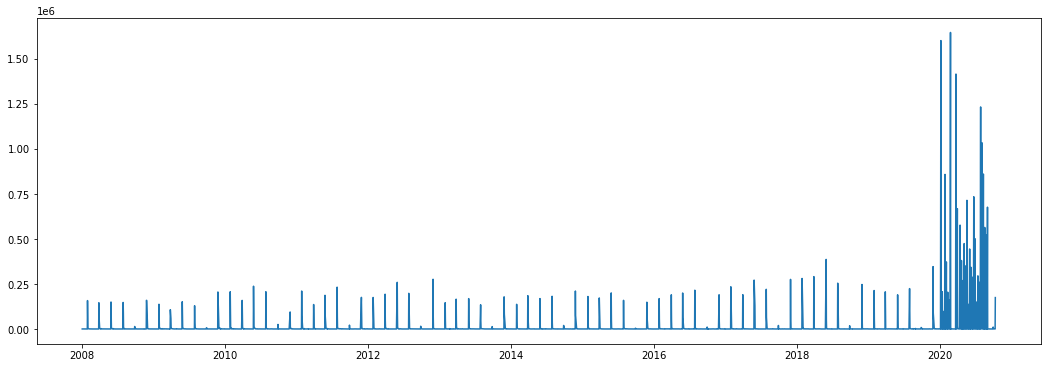

In [ ]:
plt.rcParams['figure.figsize']=[18,6]
plt.plot(dv1)

In [ ]:
db1.describe()

count    3220.000000
mean     1308.844876
std       255.410975
min       704.900024
25%      1182.375031
50%      1281.000000
75%      1472.450012
max      2051.500000
Name: Close, dtype: float64

#### **Prediccion 15 dias**

In [ ]:
db_train = db1[:-15]
db_test = db1[-15:]

model=HWES(db_train,seasonal_periods=504,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())


prices_forecast=fitted.forecast(steps=15)


plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Prices of gold')
past,= plt.plot(db_train[-100:].index,db_train[-100:],label='Prices History')
future,= plt.plot(db_test.index,db_test,'r.-',label='Actual Prices')
predicted_future,= plt.plot(db_test.index,prices_forecast,'g.--',label='Test')
pronostico, = plt.plot(fitted.forecast(steps=30)[-15:].index,fitted.forecast(steps=30)[-15:],'y.--',label='Forecast')

plt.legend(handles=[past,future,predicted_future,pronostico])
plt.show()


### Error cuadratico medio

print('Train')

print('MAE:', mean_absolute_error(db_train,fitted.fittedvalues))
print('MSE:', mean_squared_error(db_train,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db_train,fitted.fittedvalues)))

print('Test')

print('MAE:', mean_absolute_error(db_test,prices_forecast))
print('MSE:', mean_squared_error(db_test,prices_forecast))
print('RMSE:', math.sqrt(mean_squared_error(db_test,prices_forecast)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 3205
Model:             ExponentialSmoothing   SSE                        1224280.715
Optimized:                         True   AIC                          20070.996
Trend:                   Multiplicative   BIC                          23155.810
Seasonal:                Multiplicative   AICC                         20264.471
Seasonal Periods:                   504   Date:                 Fri, 09 Oct 2020
Box-Cox:                          False   Time:                         16:01:26
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.7474999                alpha                 True
smoothing_trend       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

#### **Prediccion 30 dias**

# **Pronostico con datos en meses**

#### **Descarga de informacion de Yahoo Finance**


In [ ]:
data=yf.download(tickers="GC=F",period='max',interval='1mo',group_by='column',auto_adjust=True,prepost=True,threads=True,proxy=None)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data=data['2000-09-01':'2020-10-01']

In [ ]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df_d=data.Close
df_h=data.High
df_l=data.Low
df_v=data.Volume
df_o=data.Open

In [ ]:
fec_inicial='2001-01-01'
dt=df_d[fec_inicial:]
db=df_d[fec_inicial:]
dh=df_h[fec_inicial:]
dl=df_l[fec_inicial:]
dv=df_v[fec_inicial:]
dvar=dh-dl

#### **Exploracion de datos**

**Precios de cierre historicos del oro**

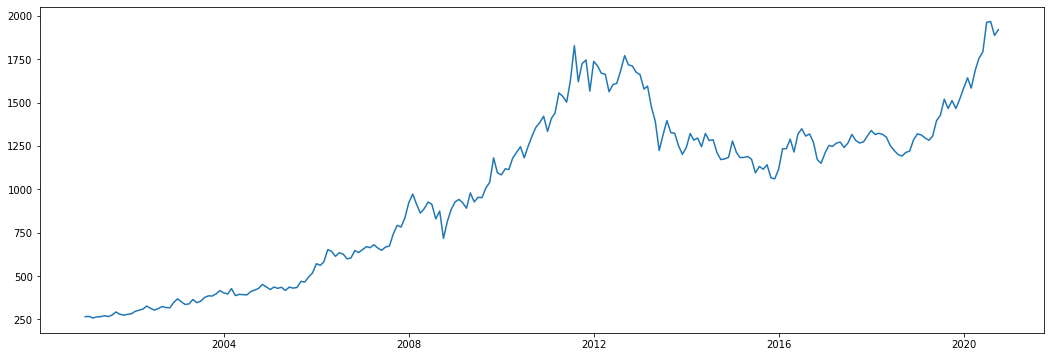

In [ ]:
plt.rcParams['figure.figsize']=[18,6]
plt.plot(db)

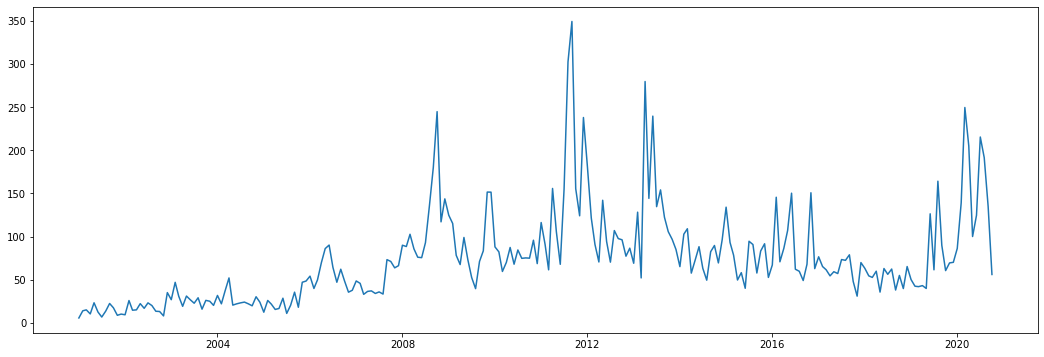

In [ ]:
plt.rcParams['figure.figsize']=[18,6]
plt.plot(dvar)

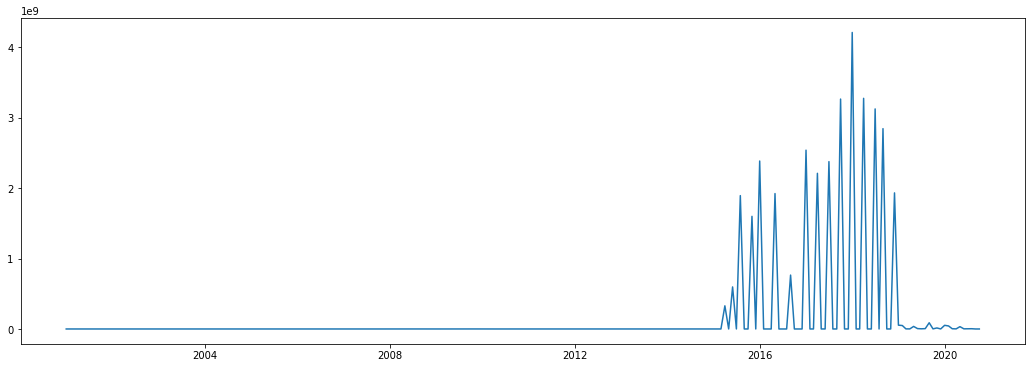

In [ ]:
plt.rcParams['figure.figsize']=[18,6]
plt.plot(dv)

In [ ]:
db.describe()

count     238.000000
mean     1005.465967
std       470.399825
min       257.899994
25%       528.224976
50%      1170.950012
75%      1317.850006
max      1967.599976
Name: Close, dtype: float64

In [ ]:
db.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', name='Date', length=238, freq=None)

#### **Prediccion 3 meses**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  235
Model:             ExponentialSmoothing   SSE                         763458.926
Optimized:                         True   AIC                           1956.217
Trend:                   Multiplicative   BIC                           2053.085
Seasonal:                Multiplicative   AICC                          1965.334
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         14:30:40
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828572                alpha                 True
smoothing_trend          

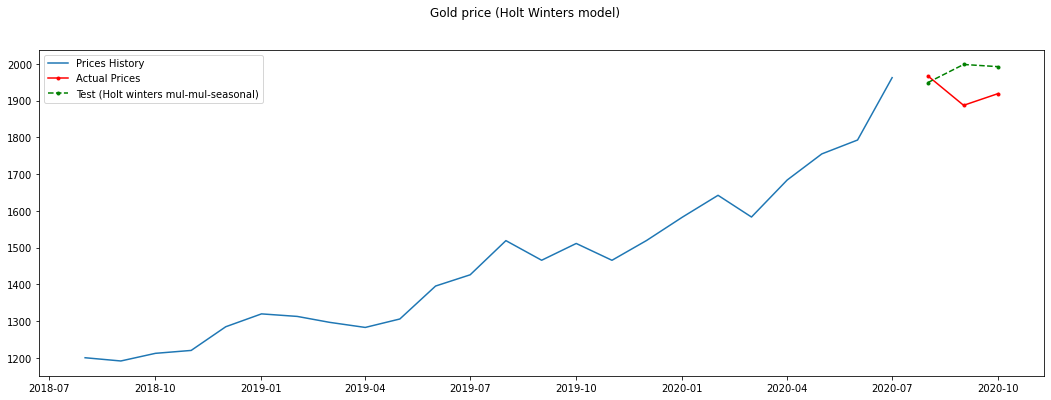

Train
MAE: 41.168261430716754
MSE: 3248.7613869569045
RMSE: 56.997906864699026
Test
MAE: 67.537006168617
MSE: 6019.689805278321
RMSE: 77.5866599698577
2020-08-01    1949.423385
2020-09-01    1998.699467
2020-10-01    1992.734960
2020-11-01    1999.195672
2020-12-01    2073.130390
2021-01-01    2140.066998
Freq: MS, dtype: float64


In [ ]:
db_train = db[:-3]
db_test = db[-3:]

model=HWES(db_train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())


prices_forecast=fitted.forecast(steps=3)

plt.rcParams['figure.figsize']=[18,6]

fig=plt.figure()
fig.suptitle('Gold price (Holt Winters model)')
past,= plt.plot(db_train[-24:].index,db_train[-24:],label='Prices History')
future,= plt.plot(db_test.index,db_test,'r.-',label='Actual Prices')
predicted_future,= plt.plot(db_test.index,prices_forecast,'g.--',label='Test (Holt winters mul-mul-seasonal)')
pronostico, = plt.plot(fitted.forecast(steps=6)[-3:].index,fitted.forecast(steps=6)[-3:],'y.--',label='Forecast')

plt.legend(handles=[past,future,predicted_future, pronostico])
plt.show()


### Error cuadratico medio

print('Train')

print('MAE:', mean_absolute_error(db_train,fitted.fittedvalues))
print('MSE:', mean_squared_error(db_train,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db_train,fitted.fittedvalues)))

print('Test')

print('MAE:', mean_absolute_error(db_test,prices_forecast))
print('MSE:', mean_squared_error(db_test,prices_forecast))
print('RMSE:', math.sqrt(mean_squared_error(db_test,prices_forecast)))


### predicciones

print(fitted.forecast(steps=6))


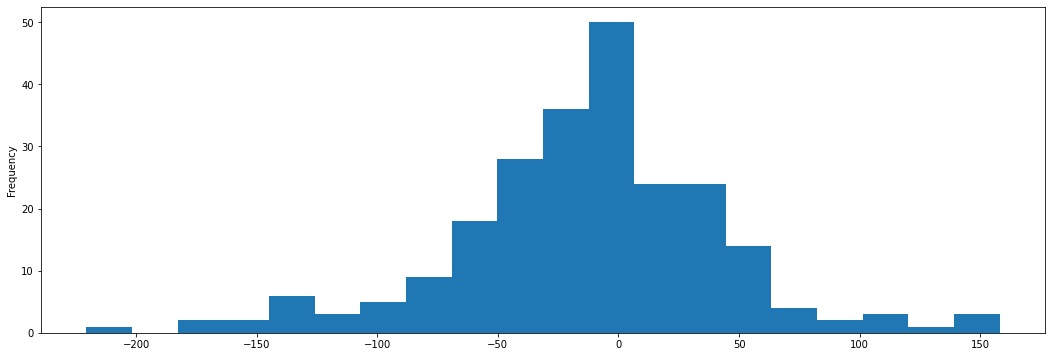

In [ ]:
fitted.resid.plot.hist(bins = 20)

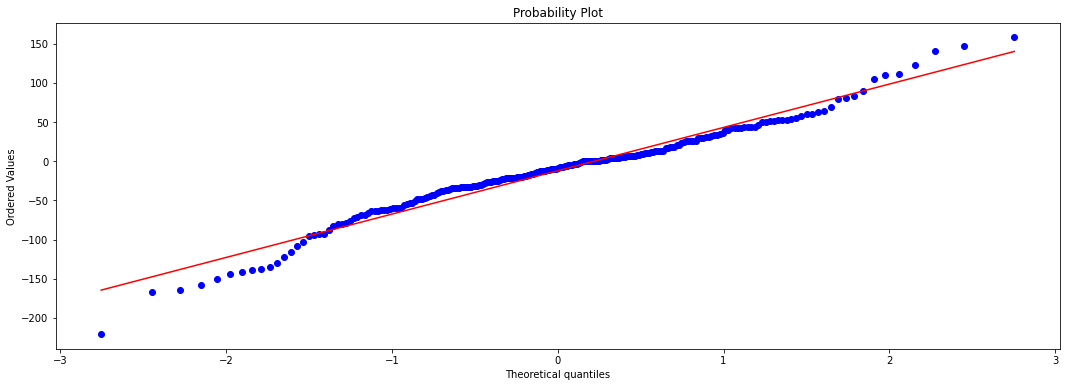

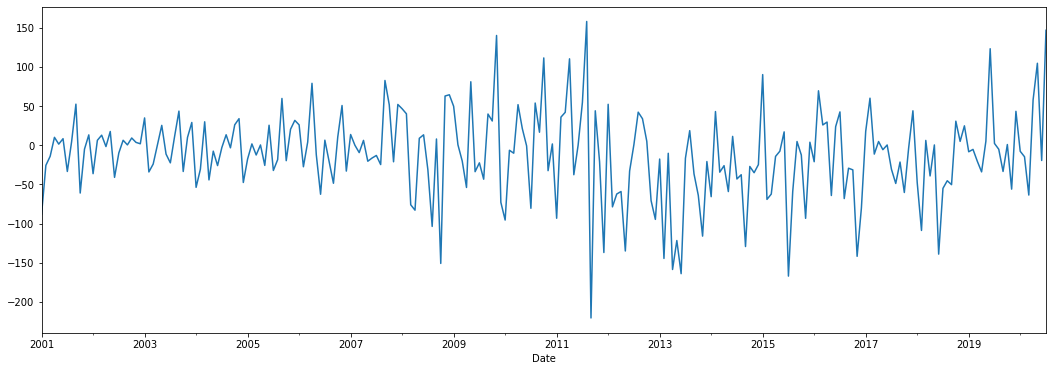

In [ ]:
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

fitted.resid.plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  238
Model:             ExponentialSmoothing   SSE                         845222.485
Optimized:                         True   AIC                           2001.670
Trend:                   Multiplicative   BIC                           2098.894
Seasonal:                Multiplicative   AICC                          2010.656
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         14:33:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828572                alpha                 True
smoothing_trend          

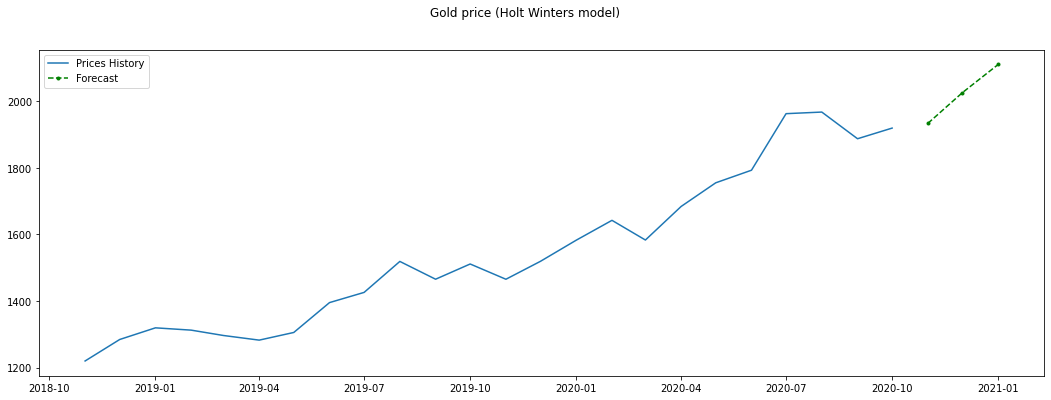

MAE: 43.1816589514602
MSE: 3551.354977991574
RMSE: 59.593246076980684
2020-11-01    1933.652239
2020-12-01    2026.039207
2021-01-01    2110.536958
Freq: MS, dtype: float64


In [ ]:
model=HWES(db,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

prices_forecast=fitted.forecast(steps=3)

plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Gold price (Holt Winters model)')
past,= plt.plot(db[-24:].index,db[-24:],label='Prices History')
predicted_future,= plt.plot(prices_forecast.index,prices_forecast,'g.--',label='Forecast')
plt.legend(handles=[past,predicted_future])
plt.show()



print('MAE:', mean_absolute_error(db,fitted.fittedvalues))
print('MSE:', mean_squared_error(db,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db,fitted.fittedvalues)))

print(prices_forecast)

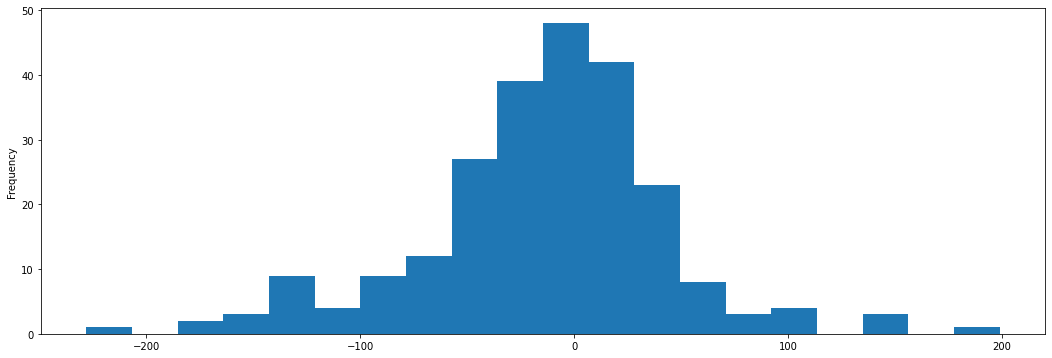

In [ ]:
fitted.resid.plot.hist(bins = 20)

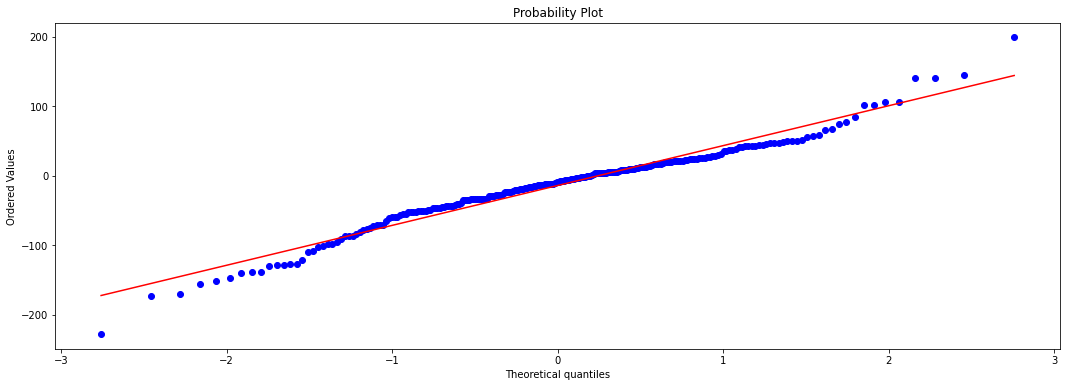

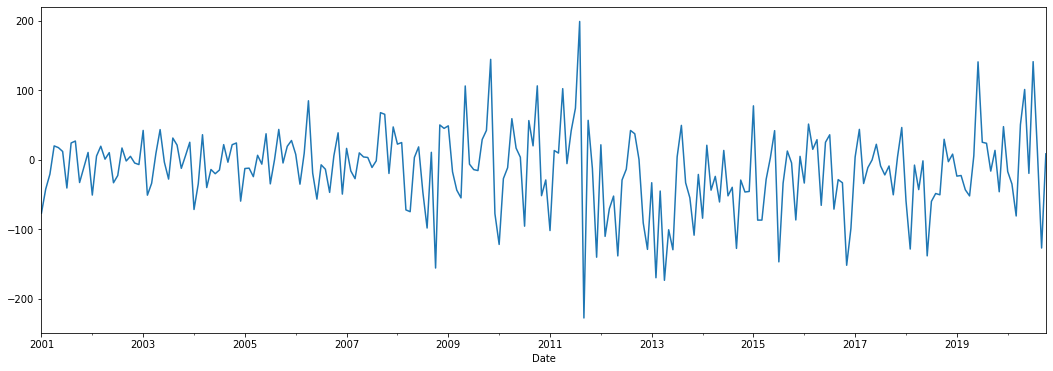

In [ ]:
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

fitted.resid.plot()

#### **Prediccion 6 meses**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  232
Model:             ExponentialSmoothing   SSE                         927453.394
Optimized:                         True   AIC                           1980.083
Trend:                   Multiplicative   BIC                           2076.591
Seasonal:                Multiplicative   AICC                          1989.337
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         14:48:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828571                alpha                 True
smoothing_trend          

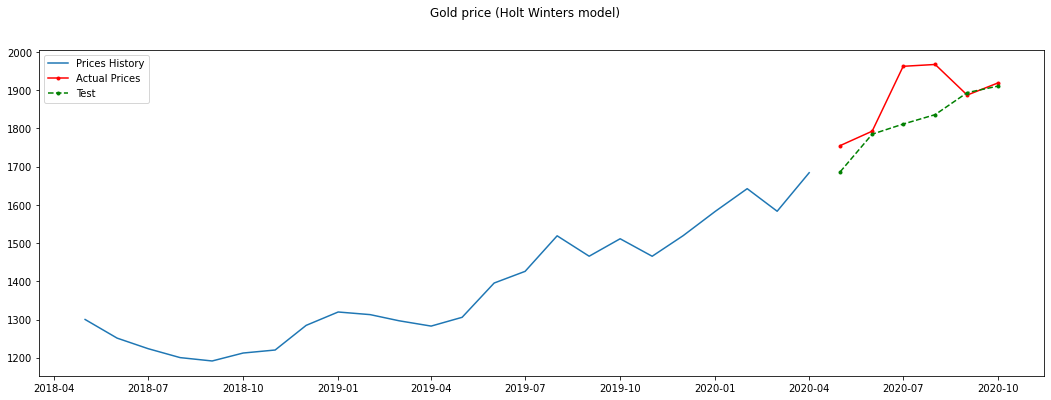

Train
MAE: 44.07535254090108
MSE: 3997.6439397142253
RMSE: 63.22692416774855
Test
MAE: 62.30067432513272
MSE: 7497.905340553345
RMSE: 86.5904460119784
2020-05-01    1686.517133
2020-06-01    1785.137471
2020-07-01    1811.600639
2020-08-01    1836.314646
2020-09-01    1893.874862
2020-10-01    1911.100903
2020-11-01    1955.292592
2020-12-01    2076.021377
2021-01-01    2155.998186
2021-02-01    2123.011646
2021-03-01    2079.266262
2021-04-01    2062.801009
Freq: MS, dtype: float64


In [ ]:
db_train = db[:-6]
db_test = db[-6:]

model=HWES(db_train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

prices_forecast=fitted.forecast(steps=6)


plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Gold price (Holt Winters model)')
past,= plt.plot(db_train[-24:].index,db_train[-24:],label='Prices History')
future,= plt.plot(db_test.index,db_test,'r.-',label='Actual Prices')
predicted_future,= plt.plot(db_test.index,prices_forecast,'g.--',label='Test')
pronostico, = plt.plot(fitted.forecast(steps=12)[-6:].index,fitted.forecast(steps=12)[-6:],'y.--',label='Forecast')

plt.legend(handles=[past,future,predicted_future,pronostico])
plt.show()


### Error cuadratico medio

print('Train')

print('MAE:', mean_absolute_error(db_train,fitted.fittedvalues))
print('MSE:', mean_squared_error(db_train,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db_train,fitted.fittedvalues)))

print('Test')

print('MAE:', mean_absolute_error(db_test,prices_forecast))
print('MSE:', mean_squared_error(db_test,prices_forecast))
print('RMSE:', math.sqrt(mean_squared_error(db_test,prices_forecast)))

print(fitted.forecast(steps=12))

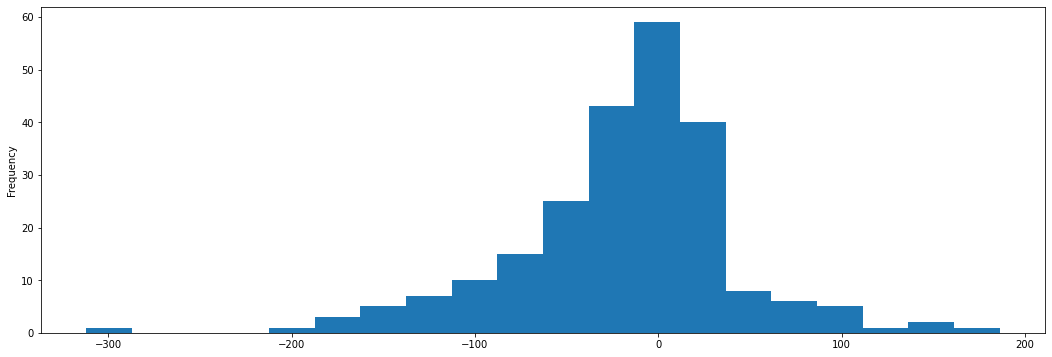

In [ ]:
fitted.resid.plot.hist(bins = 20)

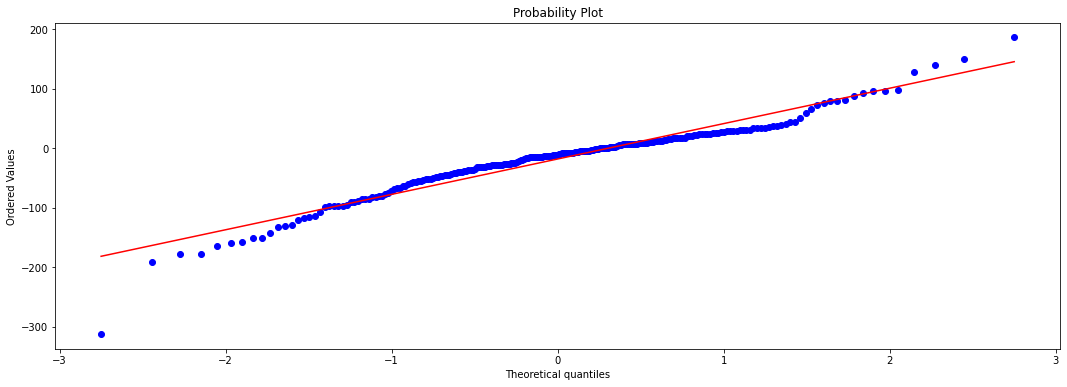

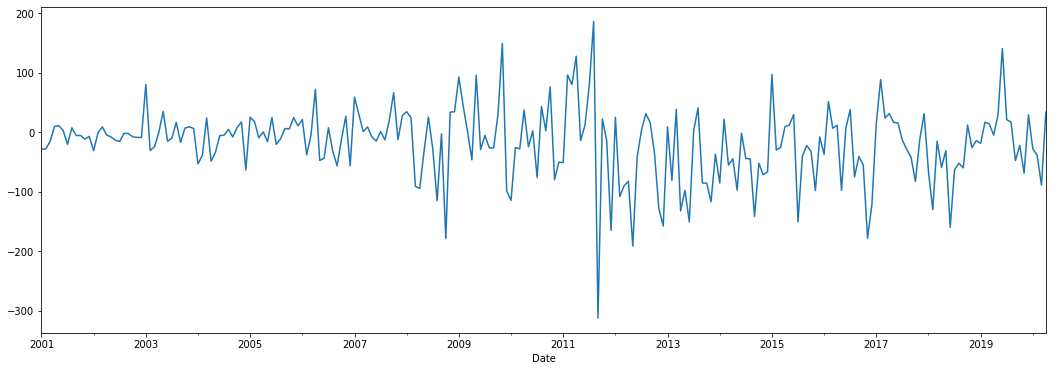

In [ ]:
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

fitted.resid.plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  238
Model:             ExponentialSmoothing   SSE                         845222.485
Optimized:                         True   AIC                           2001.670
Trend:                   Multiplicative   BIC                           2098.894
Seasonal:                Multiplicative   AICC                          2010.656
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         14:38:20
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828572                alpha                 True
smoothing_trend          

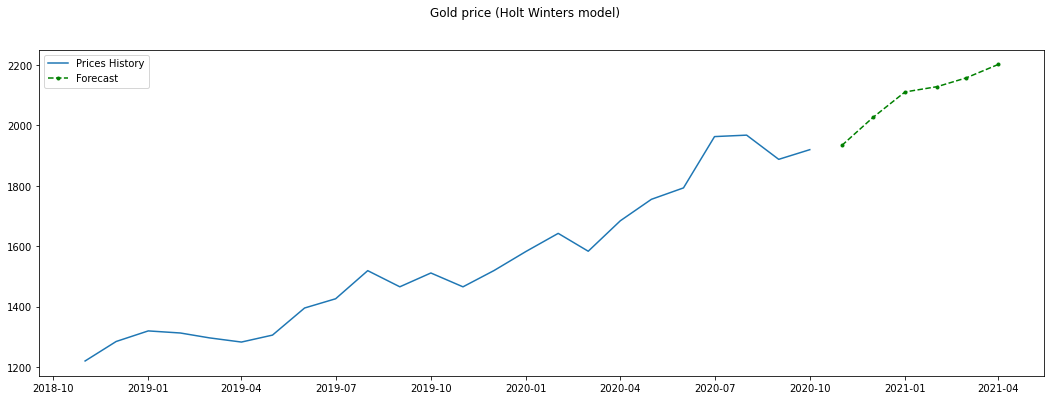

MAE: 43.1816589514602
MSE: 3551.354977991574
RMSE: 59.593246076980684
2020-11-01    1933.652239
2020-12-01    2026.039207
2021-01-01    2110.536958
2021-02-01    2128.033473
2021-03-01    2156.986230
2021-04-01    2201.500937
Freq: MS, dtype: float64


In [ ]:
model=HWES(db,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

prices_forecast=fitted.forecast(steps=6)

plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Gold price (Holt Winters model)')
past,= plt.plot(db[-24:].index,db[-24:],label='Prices History')
predicted_future,= plt.plot(prices_forecast.index,prices_forecast,'g.--',label='Forecast')
plt.legend(handles=[past,predicted_future])
plt.show()



print('MAE:', mean_absolute_error(db,fitted.fittedvalues))
print('MSE:', mean_squared_error(db,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db,fitted.fittedvalues)))

print(prices_forecast)

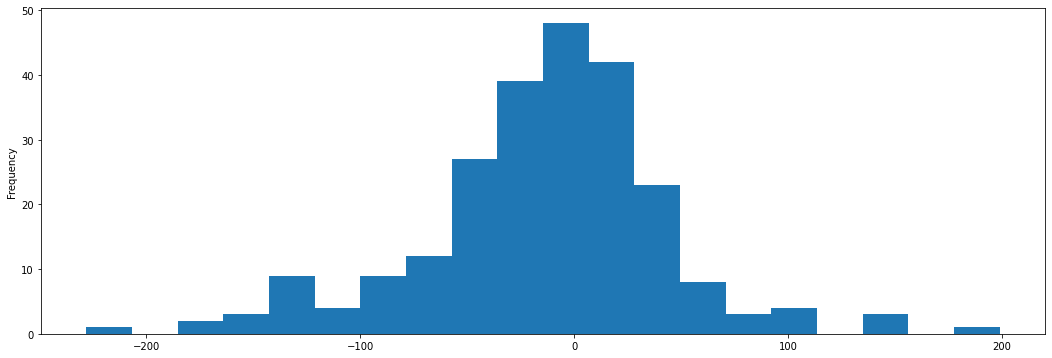

In [ ]:
fitted.resid.plot.hist(bins = 20)

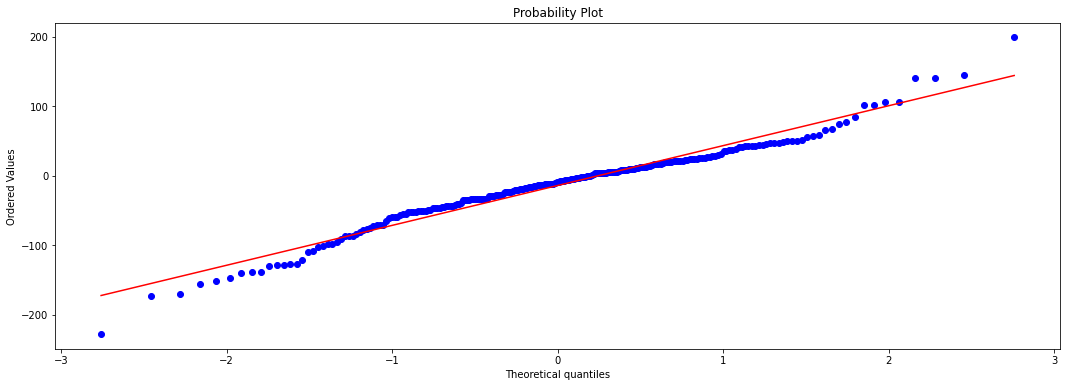

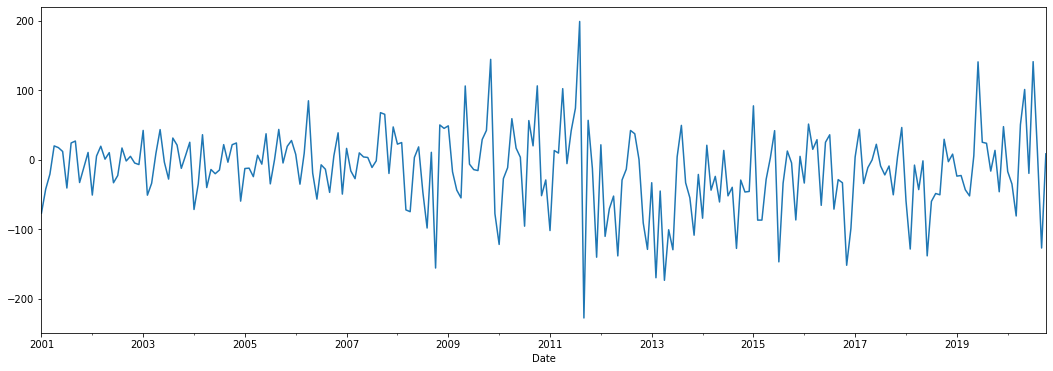

In [ ]:
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

fitted.resid.plot()

#### **Prdiccion 9 meses**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  229
Model:             ExponentialSmoothing   SSE                         716624.308
Optimized:                         True   AIC                           1899.126
Trend:                   Multiplicative   BIC                           1995.270
Seasonal:                Multiplicative   AICC                          1908.520
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         15:45:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828572                alpha                 True
smoothing_trend          

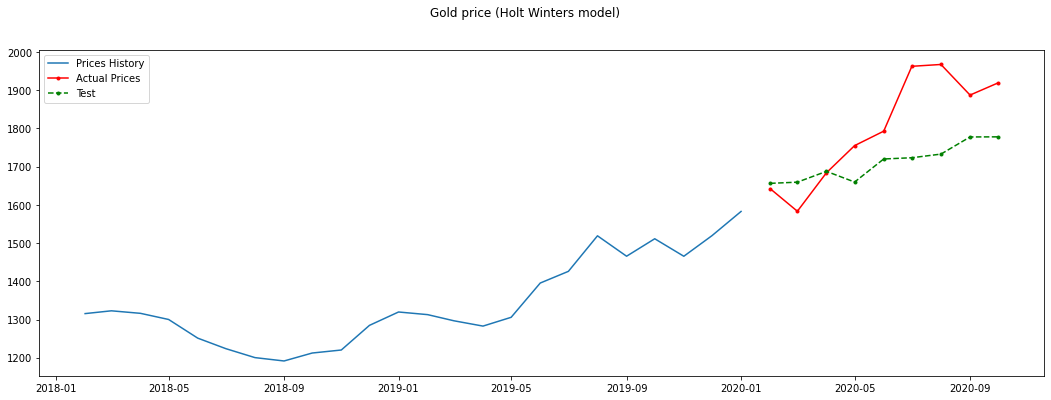

Train
MAE: 40.71177038547809
MSE: 3129.363791619763
RMSE: 55.94071675997514
Test
MAE: 109.6344311217681
MSE: 18300.618379122458
RMSE: 135.27977816038307
2020-02-01    1656.419588
2020-03-01    1659.520705
2020-04-01    1687.817554
2020-05-01    1659.862171
2020-06-01    1720.203018
2020-07-01    1723.472784
2020-08-01    1732.998319
2020-09-01    1777.858692
2020-10-01    1778.152984
2020-11-01    1790.443252
2020-12-01    1865.259067
2021-01-01    1930.388531
2021-02-01    1930.797138
2021-03-01    1937.580995
2021-04-01    1960.014555
2021-05-01    1984.136881
2021-06-01    1965.790607
2021-07-01    2002.000542
Freq: MS, dtype: float64


In [ ]:
db_train = db[:-9]
db_test = db[-9:]

model=HWES(db_train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

prices_forecast=fitted.forecast(steps=9)


plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Gold price (Holt Winters model)')
past,= plt.plot(db_train[-24:].index,db_train[-24:],label='Prices History')
future,= plt.plot(db_test.index,db_test,'r.-',label='Actual Prices')
predicted_future,= plt.plot(db_test.index,prices_forecast,'g.--',label='Test')
pronostico, = plt.plot(fitted.forecast(steps=18)[-9:].index,fitted.forecast(steps=18)[-9:],'y.--',label='Forecast')

plt.legend(handles=[past,future,predicted_future,pronostico])
plt.show()


### Error cuadratico medio

print('Train')

print('MAE:', mean_absolute_error(db_train,fitted.fittedvalues))
print('MSE:', mean_squared_error(db_train,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db_train,fitted.fittedvalues)))

print('Test')

print('MAE:', mean_absolute_error(db_test,prices_forecast))
print('MSE:', mean_squared_error(db_test,prices_forecast))
print('RMSE:', math.sqrt(mean_squared_error(db_test,prices_forecast)))


print(fitted.forecast(steps=18))

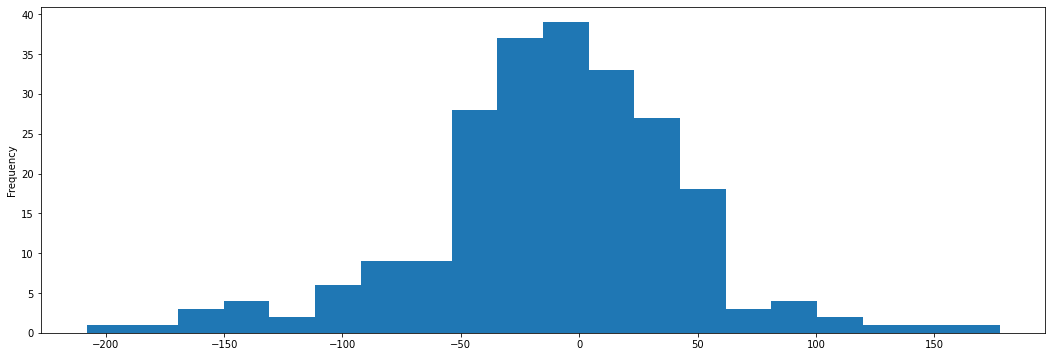

In [ ]:
fitted.resid.plot.hist(bins = 20)

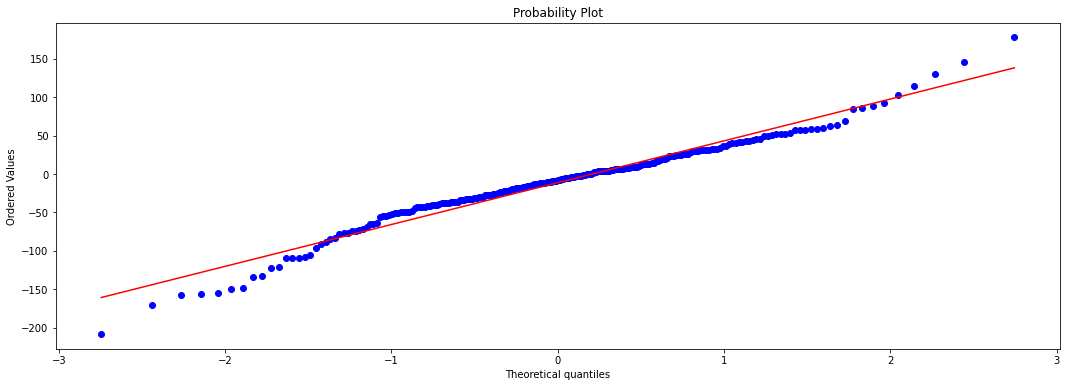

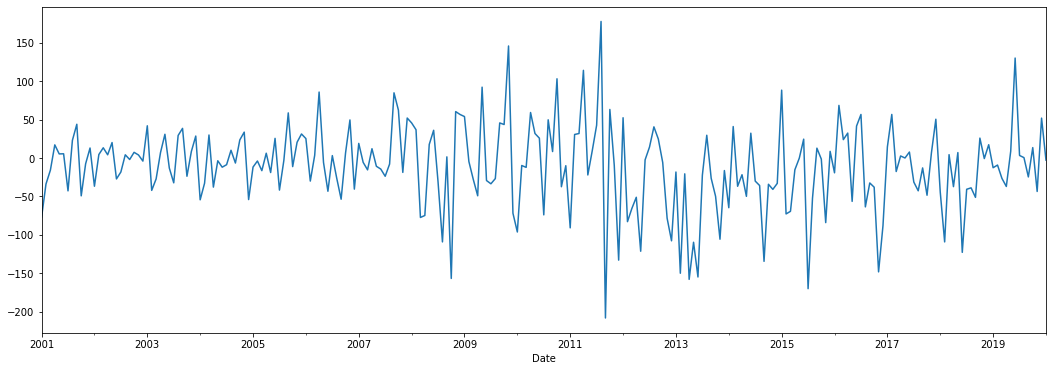

In [ ]:
stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

fitted.resid.plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  238
Model:             ExponentialSmoothing   SSE                         845222.485
Optimized:                         True   AIC                           2001.670
Trend:                   Multiplicative   BIC                           2098.894
Seasonal:                Multiplicative   AICC                          2010.656
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         15:07:35
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828572                alpha                 True
smoothing_trend          

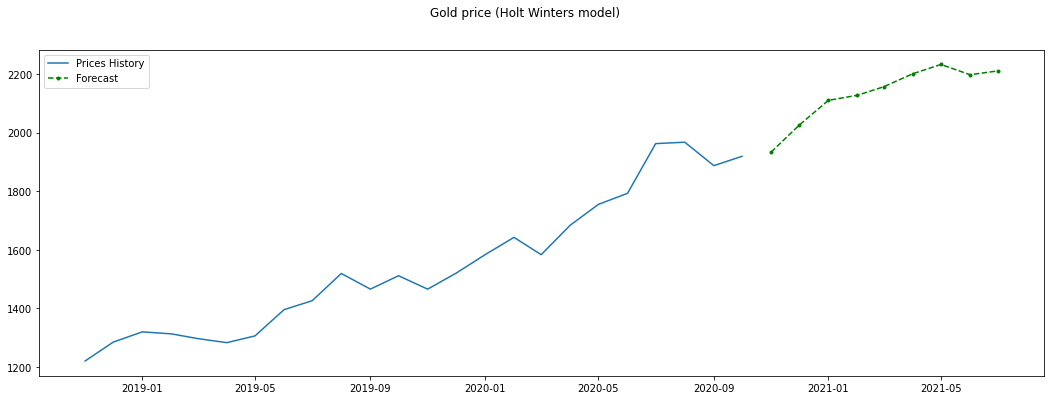

MAE: 43.1816589514602
MSE: 3551.354977991574
RMSE: 59.593246076980684
2020-11-01    1933.652239
2020-12-01    2026.039207
2021-01-01    2110.536958
2021-02-01    2128.033473
2021-03-01    2156.986230
2021-04-01    2201.500937
2021-05-01    2233.200032
2021-06-01    2198.189053
2021-07-01    2211.330335
Freq: MS, dtype: float64


In [ ]:
model=HWES(db,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

prices_forecast=fitted.forecast(steps=9)

plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Gold price (Holt Winters model)')
past,= plt.plot(db[-24:].index,db[-24:],label='Prices History')
predicted_future,= plt.plot(prices_forecast.index,prices_forecast,'g.--',label='Forecast')
plt.legend(handles=[past,predicted_future])
plt.show()



print('MAE:', mean_absolute_error(db,fitted.fittedvalues))
print('MSE:', mean_squared_error(db,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db,fitted.fittedvalues)))


print(prices_forecast)

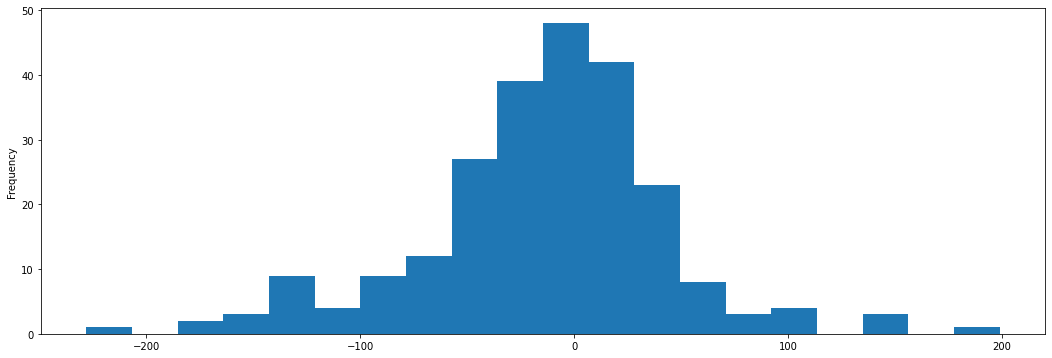

In [ ]:
fitted.resid.plot.hist(bins = 20)

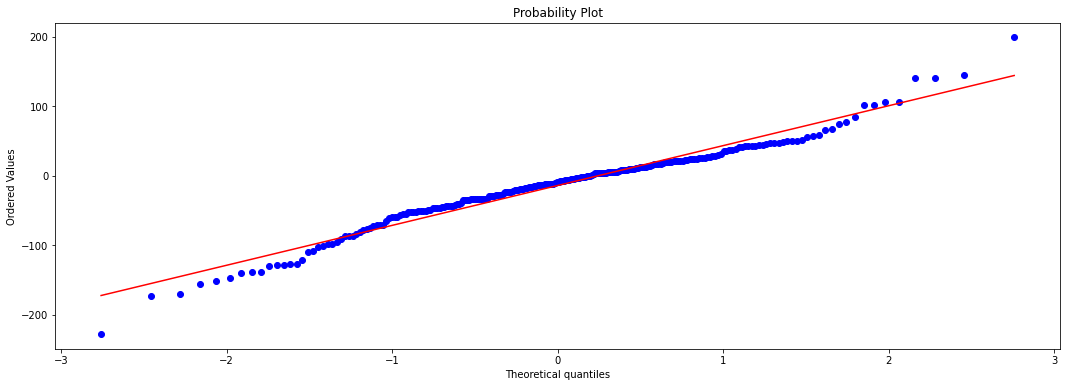

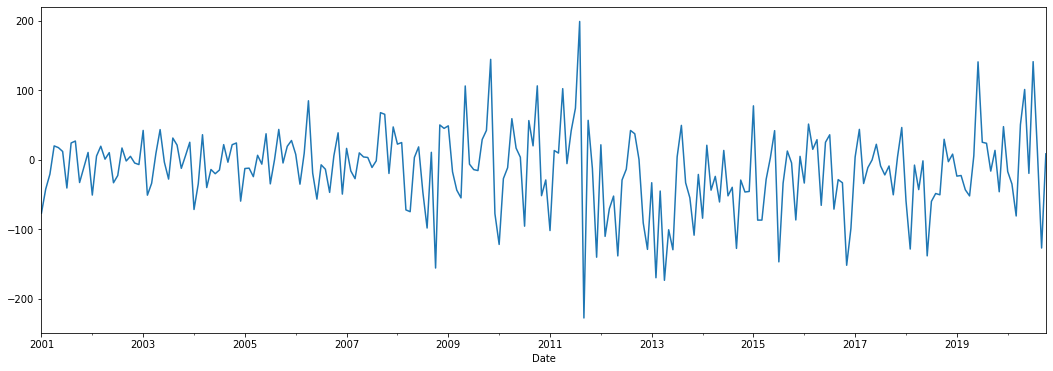

In [ ]:

stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

fitted.resid.plot()





#### **Prediccion 12 meses**


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  226
Model:             ExponentialSmoothing   SSE                         688608.667
Optimized:                         True   AIC                           1868.948
Trend:                   Multiplicative   BIC                           1964.723
Seasonal:                Multiplicative   AICC                          1878.486
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         17:02:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828571                alpha                 True
smoothing_trend          

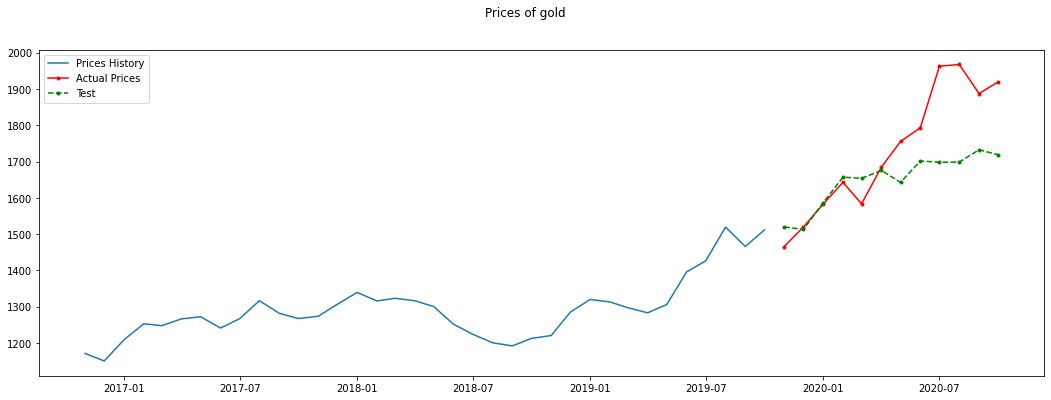

Train
MAE: 40.05721531609015
MSE: 3046.9410030761933
RMSE: 55.199103281450085
Test
MAE: 104.35805592966962
MSE: 19684.276936725248
RMSE: 140.3006662020008
2019-11-01    1519.551870
2019-12-01    1512.632572
2020-01-01    1586.746357
2020-02-01    1656.886123
2020-03-01    1653.646680
2020-04-01    1675.360765
2020-05-01    1642.521594
2020-06-01    1701.386940
2020-07-01    1698.125713
2020-08-01    1698.374338
2020-09-01    1732.298569
2020-10-01    1718.733770
2020-11-01    1718.576727
2020-12-01    1774.394690
2021-01-01    1825.373672
2021-02-01    1818.327896
2021-03-01    1817.004250
2021-04-01    1833.567553
2021-05-01    1862.746061
2021-06-01    1854.504766
2021-07-01    1887.828285
2021-08-01    2015.904605
2021-09-01    1979.513282
2021-10-01    2040.254681
Freq: MS, dtype: float64


In [ ]:
db_train = db[:-12]
db_test = db[-12:]


model=HWES(db_train,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

prices_forecast=fitted.forecast(steps=12)



plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Prices of gold')
past,= plt.plot(db_train[-36:].index,db_train[-36:],label='Prices History')
future,= plt.plot(db_test.index,db_test,'r.-',label='Actual Prices')
predicted_future,= plt.plot(db_test.index,prices_forecast,'g.--',label='Test')
pronostico, = plt.plot(fitted.forecast(steps=24)[-12:].index,fitted.forecast(steps=24)[-12:],'y.--',label='Forecast')
plt.legend(handles=[past,future,predicted_future,pronostico])
plt.show()

### Error cuadratico medio

print('Train')

print('MAE:', mean_absolute_error(db_train,fitted.fittedvalues))
print('MSE:', mean_squared_error(db_train,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db_train,fitted.fittedvalues)))

print('Test')

print('MAE:', mean_absolute_error(db_test,prices_forecast))
print('MSE:', mean_squared_error(db_test,prices_forecast))
print('RMSE:', math.sqrt(mean_squared_error(db_test,prices_forecast)))

print(fitted.forecast(steps=24))

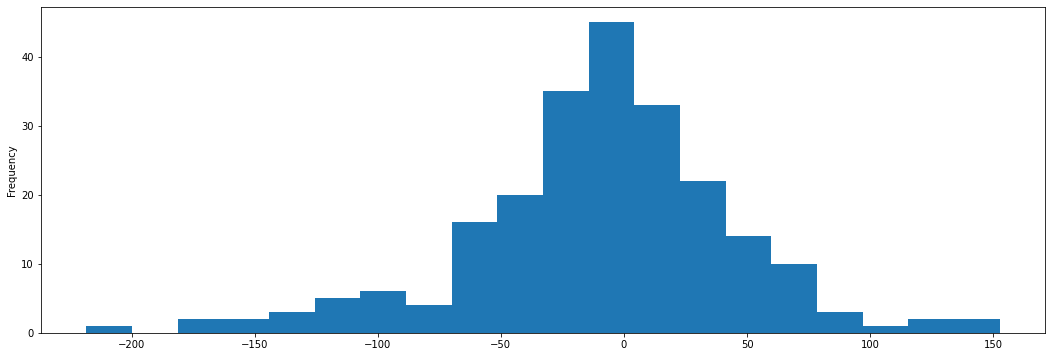

In [ ]:
fitted.resid.plot.hist(bins = 20)

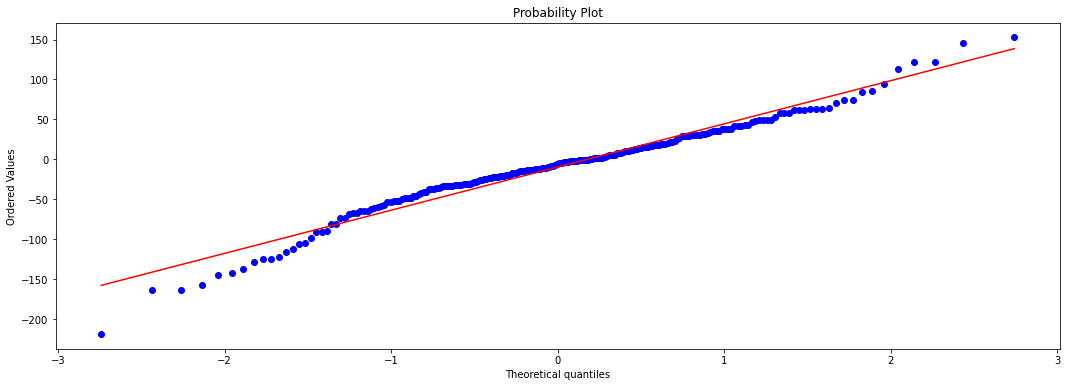

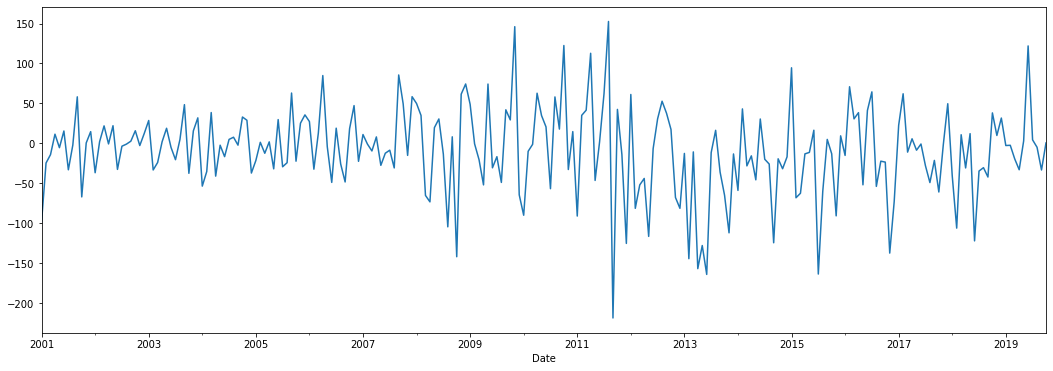

In [ ]:

stats.probplot(fitted.resid, dist="norm", plot=pylab)
pylab.show()

fitted.resid.plot()

In [ ]:

import statsmodels
print(statsmodels.__version__)


0.12.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


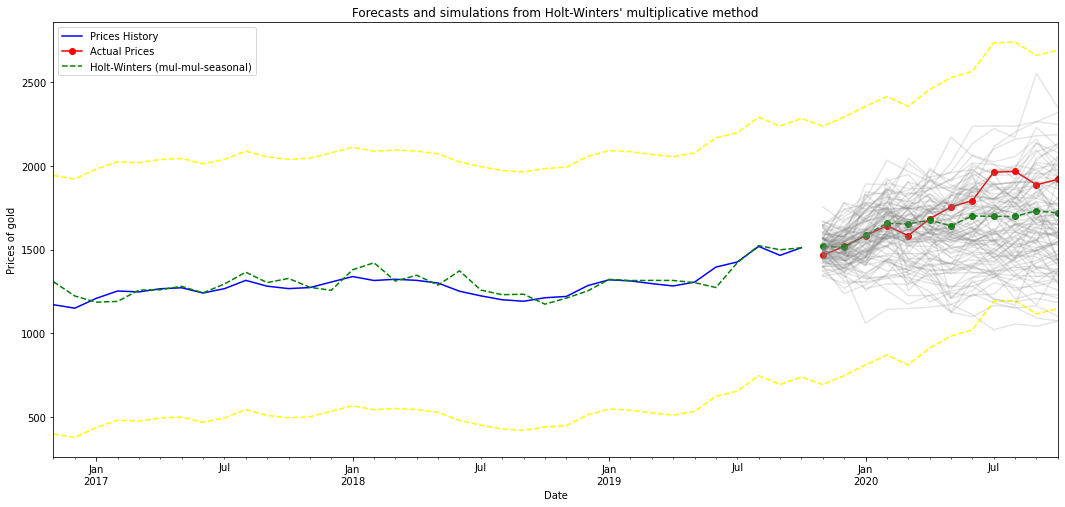

In [ ]:
fit = HWES(db_train, seasonal_periods=24, trend='mul', seasonal='mul').fit()
simulations = fit.simulate(12, anchor='2019-11-01', repetitions=100, error='mul', random_errors='bootstrap')

ax = db_train[-36:].rename('Prices History').plot(figsize=(18,8), color='blue',legend=True,
               title="Forecasts and simulations from Holt-Winters' multiplicative method" )
ax.set_ylabel("Prices of gold")
ax.set_xlabel("Date")
db_test.rename('Actual Prices').plot(ax=ax, style='-', marker='o', color='red', legend=True)
fit.fittedvalues[-36:].plot(ax=ax, style='--', color='green')
fit.forecast(steps=12).rename('Holt-Winters (mul-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

c=.95

lim_inf=db - ndtri(c)*np.std(db)
lim_sup=db + ndtri(c)*np.std(db)

lim_inf[-48:].plot(ax=ax, style='--', color='yellow')
lim_sup[-48:].plot(ax=ax, style='--', color='yellow')


simulations.plot(ax=ax, style='-', alpha=0.20, color='gray', legend= False)



plt.show()

In [ ]:
import statsmodels.stats.api as sms

sms.DescrStatsW(db[-36:]).tconfint_mean()

(1375.4898171889706, 1533.199066274571)

In [ ]:
import numpy as np, scipy.stats as st

st.t.interval(0.95, len(db)-1, loc=np.mean(db), scale=st.sem(db))

(945.3969963072346, 1065.5349382097363)

In [ ]:
## Pronostico 12 meses

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  238
Model:             ExponentialSmoothing   SSE                         845222.485
Optimized:                         True   AIC                           2001.670
Trend:                   Multiplicative   BIC                           2098.894
Seasonal:                Multiplicative   AICC                          2010.656
Seasonal Periods:                    24   Date:                 Mon, 12 Oct 2020
Box-Cox:                          False   Time:                         17:13:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7828572                alpha                 True
smoothing_trend          

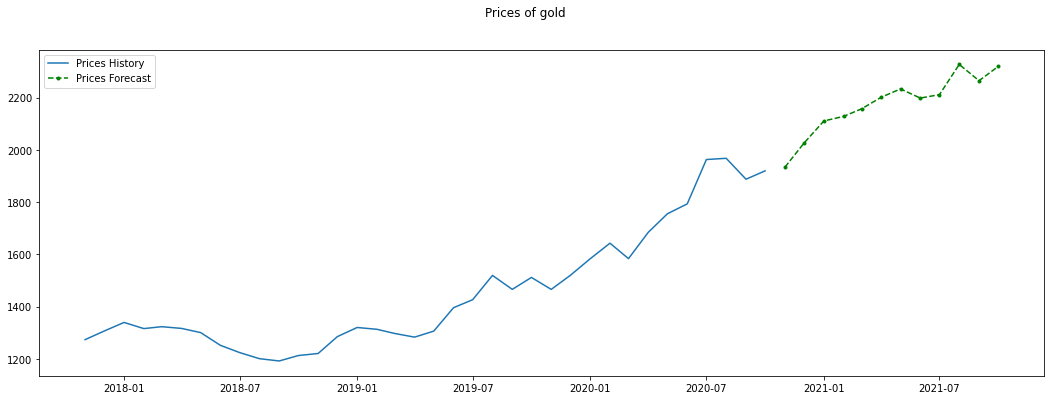

MAE: 43.1816589514602
MSE: 3551.354977991574
RMSE: 59.593246076980684
2020-11-01    1933.652239
2020-12-01    2026.039207
2021-01-01    2110.536958
2021-02-01    2128.033473
2021-03-01    2156.986230
2021-04-01    2201.500937
2021-05-01    2233.200032
2021-06-01    2198.189053
2021-07-01    2211.330335
2021-08-01    2326.848107
2021-09-01    2264.752198
2021-10-01    2319.197635
Freq: MS, dtype: float64


In [ ]:
model=HWES(db,seasonal_periods=24,trend='mul',seasonal='mul')
fitted=model.fit()
print(fitted.summary())

prices_forecast=fitted.forecast(steps=12)

plt.rcParams['figure.figsize']=[18,6]
fig=plt.figure()
fig.suptitle('Prices of gold')
past,= plt.plot(db[-36:].index,db[-36:],label='Prices History')
predicted_future,= plt.plot(prices_forecast.index,prices_forecast,'g.--',label='Prices Forecast')
plt.legend(handles=[past,predicted_future])
plt.show()

### Error cuadratico medio

print('MAE:', mean_absolute_error(db,fitted.fittedvalues))
print('MSE:', mean_squared_error(db,fitted.fittedvalues))
print('RMSE:', math.sqrt(mean_squared_error(db,fitted.fittedvalues)))

print(fitted.forecast(steps=12))

In [ ]:
fit = HWES(db, seasonal_periods=24, trend='mul', seasonal='mul').fit()
simulations = fit.simulate(12, anchor='2020-11-01', repetitions=500, error='mul', random_errors='bootstrap')

ax = db['2017-01-01':].rename('Prices History').plot(figsize=(18,8), color='blue',legend=True,
               title="Forecasts and simulations from Holt-Winters' multiplicative method" )
ax.set_ylabel("Prices of gold")
ax.set_xlabel("Date")
fit.fittedvalues['2017-01-01':].plot(ax=ax, style='--', color='green')
pronostico=fit.forecast(steps=12)

c=.95

lim_inf=db - ndtri(c)*np.std(db)
lim_sup=db + ndtri(c)*np.std(db)

lim_inf_f=pronostico - ndtri(c)*np.std(db)
lim_sup_f=pronostico + ndtri(c)*np.std(db)

lim_inf[-48:].plot(ax=ax, style='--', color='yellow')
lim_sup[-48:].plot(ax=ax, style='--', color='yellow')

lim_inf_f.plot(ax=ax, style='--', color='yellow')
lim_sup_f.plot(ax=ax, style='--', color='yellow')

simulations.plot(ax=ax, style='-', alpha=0.20, color='gray', legend= False)

pronostico.rename('Holt-Winters (mul-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()

In [ ]:
#simulations.describe()
simulations.T.describe()

In [ ]:
print(simulations)